In [47]:
import cv2 as cv
import os
import glob
from sklearn.utils import shuffle
import numpy as np
from pathlib import Path
import matplotlib.image as mpimg
from matplotlib   import pyplot as plt
%matplotlib inline  

Test hàm

In [ ]:
# x=np.arange(1,13).reshape(2,2,3)
# y=np.arange(1,13).reshape(3,4)
# print(x)
# print(x.shape[-1])

# # a,b=shuffle(x,y)
# # c=shuffle(y)

# # d=x.shape[0]
# # print(d)
# # print("x:\n",x)
# # print("a\n",a)
# # print("b\n",b)
# # print("c\n",c)

# #test array
# a=[]
# for i in range(5):
#     a.append(i)
# print(a)

# a=np.array(a)
# print(a.shape[0])

# p=Path(dir_path)

In [3]:
#path file
# p =Path(r"D:\DatasetJapanese\data_use_kl")
# print(p.is_dir())
# classifier =[]
# for file in p.iterdir():
#     if (file.is_dir()):
# #         print(file)
#         classifier.append(file)

# print(len(classifier))
# str(classifier[0])

True
92


'D:\\DatasetJapanese\\data_use_kl\\a_h'

In [21]:
## Lấy danh sách label trong tập train

In [28]:
def get_labels(train_path):
    p=Path(train_path)
    path_file =[] # return absolute path
    labels = []
    if p.is_dir():
        for file in p.iterdir():
            if file.is_dir():
                path_file.append(file)
                
        for path in path_file:
            label = path.parts[-1]
            labels.append(label)
#             print(path.parts[-1])
    else:
        raise ValueError(f"{train_path} is not a directory!!")
    return labels


# a= get_labels(r"D:\DatasetJapanese\data_use_kl\00753.png") // error
# print(a)    

# b= get_labels(r"D:\DatasetJapanese\data_use_kl")
# print((b[0])) #label


In [34]:
def load_train(train_path,img_size):
    images=[]
    labels=[]
    img_names=[]
    cls = []
    classes = get_labels(train_path)
    
    
    for fields in classes:
        index = classes.index(fields)
        # print("doc file {} (index: {})".format(fields,index))
        path = os.path.join(train_path,fields,'*')
#         print(f"path: {path}")
        files = glob.glob(path) #return list of path names that match path =path;
#         print("file: ",files)
        i=0
        for fi in files:
            img = cv.imread(fi);
            img= cv.resize(img,(img_size,img_size))
            img=img.astype(np.float32)
            img=np.multiply(img, 1.0/255.0)
            
            images.append(img)
            label = np.zeros(len(classes))
            label[index]=1
            labels.append(label)
            
            filename_base = os.path.basename(fi)
            img_names.append(filename_base)
            cls.append(fields)
            # if(i==0): #in 1 lan
            #     print('filename_base: {}'.format(filename_base))
            #     print('fields: {}'.format(fields))
            #     i+=1
  
    images=np.array(images)
    labels=np.array(labels)
    img_names=np.array(img_names)
    cls = np.array(cls)
    
    return images,labels,img_names,cls


[ 1.  0.  0.  0.  0.] 01396.png a_k
(59, 64, 64, 3)


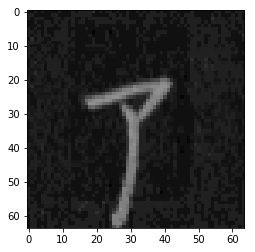

In [56]:
# # test load_train function
# images,labels,img_names,cls= load_train("D:\DatasetJapanese\data_katagana\katakana_test",64)
# print(labels[0],img_names[0],cls[0])
# img = plt.imshow(images[0])
# print(images.shape) # (total_images,img_size,img_size,channels)
# print(images.shape[0])# total_images

In [53]:
class DataSet (object):
    
    def __init__(self,images,labels,img_names,cls):
        # print("size: {} ".format(images.shape[0]))
        self._num_examples=images.shape[0]
        
        self._images= images
        self._labels=labels
        self._img_names=img_names
        self._cls = cls;
        
        self._epochs_done = 0
        self._index_in_epoch = 0
        
    @property
    def images(self):
        return self._images
    
    @property
    def labels(self):
        return self._labels
    
    @property
    def img_names(self):
        return self._img_names
    
    @property
    def cls(self):
        return self._cls
    
    @property
    def num_examples(self):
        return self._num_examples
    
    @property
    def epochs_done(self):
        return self._epochs_done


    def next_batch(self,batch_size):
        start=self._index_in_epoch
        self._index_in_epoch +=batch_size
        
        if(self._index_in_epoch >self.num_examples):
            # sau moi epoch can phai shuffle lai vi tri de du lieu duoc ngau nhien, tranh lap lai batchsize giong nhau
            self._images,self._labels,self._img_names,self._cls = shuffle(self._images,self._labels,self._img_names,self._cls)
            
            self._epochs_done +=1
            start=0
            self._index_in_epoch=batch_size
            assert batch_size <= self._num_examples
            
        end = self._index_in_epoch
        
        return self._images[start:end], self._labels[start:end], self._img_names[start:end], self._cls[start:end]

In [68]:

def read_train_sets(train_path,image_size,test_size, validation_size):
    classes = get_labels(train_path)
    class DataSets(object):pass
    
    data_sets = DataSets();
    
    images,labels,img_names,cls = load_train(train_path,image_size)
    images,labels,img_names,cls = shuffle(images,labels,img_names,cls)
    
    if isinstance(test_size,float) or isinstance(test_size,float) or test_size<1 or validation_size<1 :
        test_size=int(images.shape[0] * test_size) # total_images * validation_size
        validation_size = test_size + int(images.shape[0] * validation_size)
        # print("images: {}".format(images.shape[0]))
        # print("valid: {}".format(validation_size))
        
    test_images = images[:test_size]
    test_labels = labels[:test_size]
    test_img_names = img_names[:test_size]
    test_cls = cls[:test_size]
    
    validation_images = images[test_size:validation_size]
    validation_labels = labels[test_size:validation_size]
    validation_img_names = img_names[test_size:validation_size]
    validation_cls = cls[test_size:validation_size]
    
    train_images = images[validation_size:]
    train_labels = labels[validation_size:]
    train_img_names = img_names[validation_size:]
    train_cls = cls[validation_size:]
    
    data_sets.test = DataSet(test_images,test_labels,test_img_names,test_cls)
    data_sets.train= DataSet(train_images,train_labels,train_img_names,train_cls)
    data_sets.valid = DataSet(validation_images,validation_labels,validation_img_names,validation_cls)
    
    return data_sets




# validation_size = 0.22
# train_path='D:\DatasetJapanese\\data_katagana\katakana_test'

# data=read_train_sets("D:\DatasetJapanese\data_katagana\katakana_test",image_size=10,validation_size=validation_size)
# images,labels,img_names,cls = load_train(train_path,64)
# print(data.train.images.shape)
# print(data.valid.images.shape)
# print(images.shape)

(47, 10, 10, 3)
(12, 10, 10, 3)
(59, 64, 64, 3)
